In [1]:
import numpy as np
import zipfile
import os
import tensorflow as tf


In [2]:
from tensorflow import keras
print(tf.__version__)

2.13.0


# 1 Loading data

In [3]:
(x_train,y_train) , (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
type(x_train)
x_train.dtype , y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [4]:
y_train[0]
import matplotlib.pyplot as plt
class_names = ["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt",
               "Sneaker","Bag","Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

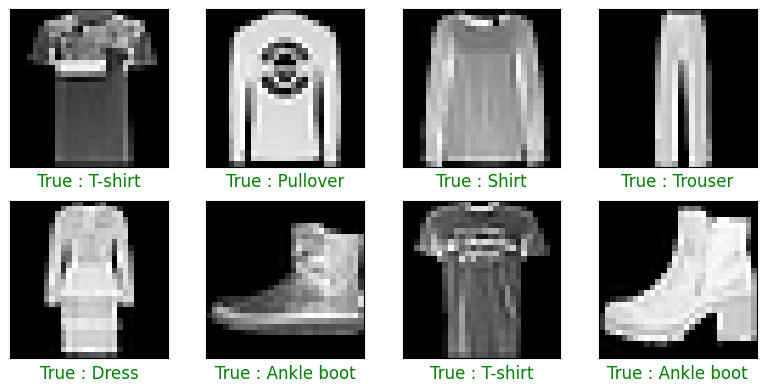

In [113]:
import random
from typing import Optional
len_x_train = len(x_train)
def plot_data(x_data : np.ndarray,y_data : np.ndarray,y_proba : Optional[np.ndarray]) ->None:
    nrows, ncols = 2,4
    len_x_train = len(x_data)
    fig , axes = plt.subplots(2,4,figsize=(8,4))
    for idx in range(8):
        ax = axes[idx // ncols,idx%ncols]
        img_idx = random.randint(0,len_x_train)
        ax.imshow(x_data[img_idx],cmap = 'gray')
        ax.set(xticks = [] , yticks= [])
        colorz = 'green'
        true_label_string  = f"True : {class_names[y_data[img_idx]]}"
        if y_proba is not None:
            predicted_idx = np.argmax(y_proba[img_idx])
            prediction_label = class_names[predicted_idx]
            colorz = 'red' if predicted_idx != y_data[img_idx] else colorz
            predicted_str = f"\nPredicted : {class_names[predicted_idx]}"
        true_label_string = true_label_string if y_proba is None else true_label_string + predicted_str
        ax.set_xlabel(true_label_string,color = colorz,fontsize = 12)
    plt.tight_layout()
plot_data(x_train,y_train,None)


# 2 Image pre-processing
- reshape it into the shape model expects and scaling it so that  all values in [0,1] invertal
- tranform from 'unit8' to 'float32'

In [6]:
X_train = x_train.astype(np.float32) / 255
X_train.dtype
X_test = x_test.astype(np.float32) / 255

In [7]:
#Expand dimention 
X_train = np.expand_dims(X_train,axis= -1)
X_test = np.expand_dims(X_test,axis= -1)

In [8]:
#Conver vector to one-hot encoder
#1
#[1,0,0,0,0,0,0,0,0]
y_train_label = keras.utils.to_categorical(y_train,len(class_names))

In [9]:
y_train_label[0]
y_test_label = keras.utils.to_categorical(y_test,len(class_names))
y_train_label[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# 3. Network Artificial

In [19]:
input_shape =(28,28,1)
from tensorflow.keras import layers
model = keras.models.Sequential([
    layers.Flatten(input_shape=input_shape), #(28,28,1) ->1D (28*28,1)
    layers.Dense(512,activation = 'relu'),
    layers.Dense(256,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',metrics='acc')


In [24]:
history = model.fit(X_train,y_train_label,epochs=10,
          batch_size=256,
          validation_split=0.1
          )

Epoch 1/10
211/211 [==============================] - 3s 13ms/step - loss: 0.1474 - acc: 0.9439 - val_loss: 0.3827 - val_acc: 0.8913
Epoch 2/10
211/211 [==============================] - 2s 11ms/step - loss: 0.1413 - acc: 0.9452 - val_loss: 0.4079 - val_acc: 0.8928
Epoch 3/10
211/211 [==============================] - 3s 14ms/step - loss: 0.1380 - acc: 0.9463 - val_loss: 0.4563 - val_acc: 0.8925
Epoch 4/10
211/211 [==============================] - 2s 12ms/step - loss: 0.1323 - acc: 0.9487 - val_loss: 0.4185 - val_acc: 0.8958
Epoch 5/10
211/211 [==============================] - 2s 10ms/step - loss: 0.1311 - acc: 0.9489 - val_loss: 0.3951 - val_acc: 0.8988
Epoch 6/10
211/211 [==============================] - 2s 10ms/step - loss: 0.1238 - acc: 0.9514 - val_loss: 0.4451 - val_acc: 0.8937
Epoch 7/10
211/211 [==============================] - 3s 12ms/step - loss: 0.1224 - acc: 0.9535 - val_loss: 0.4448 - val_acc: 0.8965
Epoch 8/10
211/211 [==============================] - 3s 16ms/step - 

In [26]:
hist_dic = history.history

In [29]:
hist_dic.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [31]:
train_loss , train_acc, val_loss , val_acc = hist_dic['loss'],hist_dic['acc'],hist_dic['val_loss'] , hist_dic['val_acc']

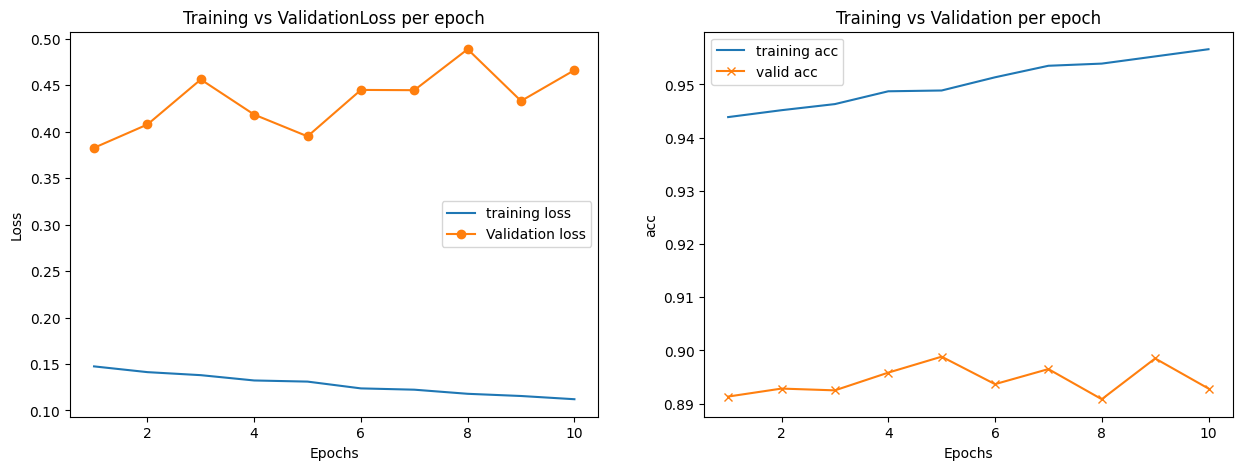

In [59]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize = (15,5))
epoch_run = [i+1 for i in range(10)]
ax1.plot(epoch_run,train_loss, label = 'training loss')
ax1.plot(epoch_run,val_loss, label = 'Validation loss', marker = 'o')
ax1.set(title="Training vs ValidationLoss per epoch", xlabel ='Epochs',ylabel = 'Loss')
ax1.legend()
ax2.plot(epoch_run,train_acc,label ='training acc')
ax2.plot(epoch_run,val_acc,label = 'valid acc',marker = 'x')
ax2.set(title="Training vs Validation per epoch", xlabel='Epochs',ylabel='acc')
plt.legend()

# 4 Model Evaluation

In [64]:
score = model.evaluate(X_test,y_test_label)
print(f"Test loss : {score[0]:.4f} , Test acc : {score[1]:.4f}")

313/313 [==============================] - 1s 4ms/step - loss: 0.4738 - acc: 0.8906
Test loss : 0.4738 , Test acc : 0.8906


# 5 prediction

In [71]:
X_sample  = X_test[:3]
y_prob = model.predict(X_sample)

1/1 [==============================] - 0s 47ms/step


In [74]:
y_prob.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

313/313 [==============================] - 1s 3ms/step


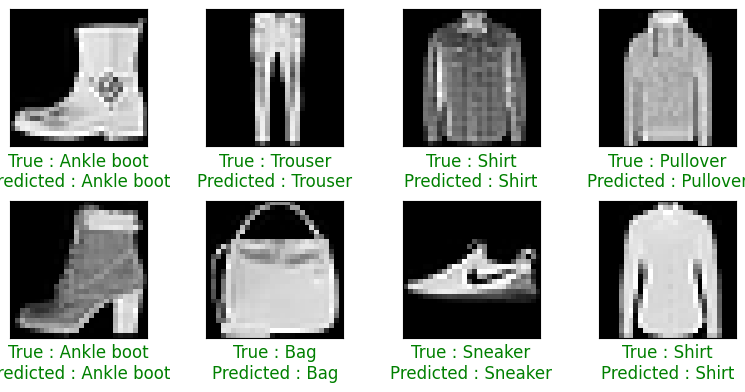

In [115]:
y_prob = model.predict(X_test)
predictions = np.argmax(y_prob,axis=1)
predictions
predicted_label = class_names[predictions[0]]
predicted_label
plot_data(X_test,y_test,y_prob)